In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Задание 1


In [2]:
df = pd.read_csv('data.csv')
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.drop(columns=['Unnamed: 0'])
df

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,512217,interest,150000,NaN,iOS,video,0.75
1,587720,interest,150000,NaN,Android,banner,0.50
2,833649,interest,150000,NaN,Android,video,0.75
3,47061,interest,150000,NaN,Android,banner,0.50
4,1035593,interest,150000,NaN,Android,partner_network,1.00
...,...,...,...,...,...,...,...
2737569,789473,purchase,201912,2136.0,Android,partner_network,1.00
2737570,1036500,purchase,202012,50.0,Android,traffic,0.00
2737571,539693,purchase,202053,50.0,iOS,traffic,0.00
2737572,583326,purchase,202140,1099.0,Android,traffic,0.00


# Задание 2

In [3]:
df = df[df['ad_channel'] != 'other']
print(df['ad_channel'].unique())

['video' 'banner' 'partner_network' 'rich' 'traffic' 'native']


# Задание 3


In [4]:
grouped = df.groupby(['ad_channel', 'funnel_stage'])['user_id'].nunique()
print(grouped)

ad_channel       funnel_stage 
banner           consideration    47454
                 intent            7630
                 interest         92002
                 purchase           690
native           consideration    12585
                 intent             411
                 interest         19382
                 purchase            36
partner_network  consideration    24737
                 intent            4422
                 interest         66225
                 purchase           453
rich             consideration     4658
                 intent            1238
                 interest          8921
                 purchase            21
traffic          consideration    53618
                 intent            9164
                 interest         78718
                 purchase           540
video            consideration    60876
                 intent              58
                 interest         97964
                 purchase             5
Name: use

# Задание 4


In [5]:
df = pd.read_csv('data.csv')
df_count = df.groupby(['user_id', 'timestamp']).agg({'timestamp': ['count']})
df_count

timestamp
                      count
user_id timestamp          
4       183254          555
5       153069            1
        153692            1
7       155779            1
8       175997            1
...                     ...
1064741 193546            1
        194117            1
1064742 176049            1
1064747 182206            1
        182961            1

[597121 rows x 1 columns]

In [6]:
df_users = df_count.timestamp[df_count.timestamp['count'] > 2]
df_users

count
user_id timestamp       
4       183254       555
73      163846       550
        165066       582
549     195410       541
645     180672       554
...                  ...
1063356 199811       535
1063617 188955       575
1063945 170866       591
1063999 171319       540
1064557 169187       511

[3765 rows x 1 columns]

In [7]:
df_frodo = df_count.timestamp[df_count.timestamp['count'] < 2]
df_frodo

count
user_id timestamp       
5       153069         1
        153692         1
7       155779         1
8       175997         1
9       156968         1
...                  ...
1064741 193546         1
        194117         1
1064742 176049         1
1064747 182206         1
        182961         1

[593355 rows x 1 columns]

In [8]:
df_users.columns

Index(['count'], dtype='object')

# Задание 5

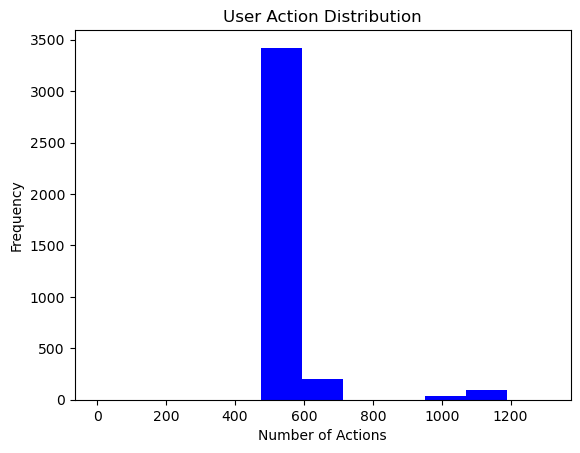

In [9]:
df5 = df_users[['count']]
actions = df_users['count'].tolist()
num_bins = 10
bin_width = max(actions) // num_bins
plt.hist(actions, bins=np.arange(0, max(actions) + bin_width, bin_width), color='blue')
plt.xlabel('Number of Actions')
plt.ylabel('Frequency')
plt.title('User Action Distribution')
plt.show()

 # Задание 6

In [10]:
df_frodo.reset_index(drop=True, inplace=True)

In [13]:
frodo_percentage = (df_frodo.shape[0] * 100 )/df.shape[0]
print("Процент фродовых значений:", frodo_percentage, "%")

Процент фродовых значений: 21.67448258932909 %


In [14]:
df_frodo.to_csv('frodo_users.csv', index=False)